Importing pandas

In [1]:
import pandas as pd
import numpy as np

Loading the clean Student Performance DataFile

In [2]:
df=pd.read_csv('cleaned_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'gender', 'race/ethnicity',
       'parental level of education', 'lunch', 'test preparation course',
       'math score', 'reading score', 'writing score', 'gender_map',
       'race/ethinicity_map', 'parental_level_of_education_map', 'lunch_map',
       'test_preparation_course_map', 'Result', 'math_performance',
       'reading_performance', 'writing_performance', 'total', 'percentage',
       'grades', 'Result_map', 'grades_map'],
      dtype='object')

# Predicting scores:

# Predict math score 


# Using Linear Regression and Random Forest

In [4]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

In [5]:
#Creating a linear model 
model = LinearRegression()

In [6]:
# training data
x = df[['test_preparation_course_map','gender_map','writing score','reading score','grades_map','Result_map']]
# target values 
y = df['math score']

In [7]:
# Splitting into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 40)

In [8]:
# Fitting linear model
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
model.score(x_test,y_test)

0.8536735927578202

In [10]:
model.score(x_train,y_train)

0.8676080875603899

In [11]:
# Predicting math score with x_test data
prediction=model.predict(x_test)
prediction

array([46.12544272, 65.57323361, 86.82298478, 68.59953789, 49.26792894,
       50.93524128, 60.07921512, 56.59423062, 61.9321963 , 65.57514138,
       56.01045044, 72.31575511, 79.25664872, 88.69245446, 56.8507535 ,
       67.26392833, 74.56115464, 46.41918239, 69.33367789, 54.11569061,
       79.10628891, 78.48833084, 72.84583   , 84.22440787, 66.45394819,
       36.74130144, 58.41190278, 90.4292537 , 87.45096171, 62.08446388,
       61.44199229, 79.6255683 , 29.87749551, 77.51415647, 61.58155661,
       78.80366151, 46.04137509, 69.86375278, 52.9342564 , 59.43218167,
       50.12587438, 61.32694151, 43.89340671, 61.24362019, 59.00636208,
       67.61456803, 64.28754412, 40.45373343, 65.74888358, 54.34504587,
       78.94322583, 87.35305967, 79.93899119, 45.47599118, 57.5311882 ,
       59.24460506, 80.62133366, 30.52885483, 72.31766288, 46.87407737,
       84.80058728, 54.4720233 , 83.10864502, 90.70849872, 72.62029028,
       60.07730735, 69.81764826, 77.51415647, 70.54609525, 40.95

Text(0, 0.5, 'Predictions')

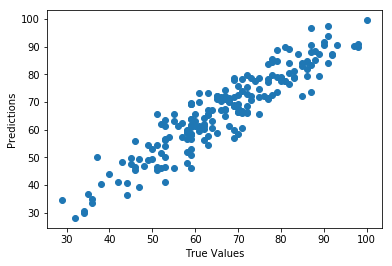

In [12]:
plt.scatter(y_test, prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Fitting X and y in RandomForestClassifier:

In [13]:
# Importing random forest
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Checking important features

In [15]:
clf.feature_importances_

array([0.01849609, 0.04902523, 0.19433559, 0.26841023, 0.40265483,
       0.06707803])

In [16]:
feature=['test_preparation_course_map','gender_map','writing score','reading score','grades_map','Result_map']
feature_imp=pd.DataFrame({'feature':feature,'importance':clf.feature_importances_})
feature_imp

,feature,importance
0,test_preparation_course_map,0.018496
1,gender_map,0.049025
2,writing score,0.194336
3,reading score,0.268410
4,grades_map,0.402655
5,Result_map,0.067078


# Removing the least important feature:

In [17]:
x1=df[['gender_map','writing score','reading score','grades_map','Result_map']]

In [18]:
clf.fit(x1,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
clf.feature_importances_

array([0.02337571, 0.18360695, 0.30474366, 0.42725031, 0.06102338])

In [20]:
feature1=['gender_map','writing score','reading score','grades_map','Result_map']
feature_imp1=pd.DataFrame({'feature':feature1,'importance':clf.feature_importances_})
feature_imp1

,feature,importance
0,gender_map,0.023376
1,writing score,0.183607
2,reading score,0.304744
3,grades_map,0.427250
4,Result_map,0.061023


Prediciting math score without test preparation course:

In [21]:
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y,test_size=0.2,random_state=123)

fitting x1_train and y1_train in linear model

In [22]:
model.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
model.score(x1_test,y1_test)

0.867720806717478

In [24]:
prediction1=model.predict(x1_test)
prediction1

array([40.8017036 , 61.6597667 , 56.91753744, 66.63464731, 60.49673562,
       68.12043464, 78.51008937, 55.46579387, 74.04454619, 73.501165  ,
       58.51363725, 84.38813076, 58.8243671 , 68.81635325, 66.92335979,
       28.85681763, 48.34460747, 70.59085306, 85.58520561, 74.01050242,
       76.2602959 , 85.69551809, 83.58325605, 33.57702952, 86.85172438,
       80.3488315 , 87.24939296, 70.04747187, 63.87551641, 41.93069092,
       79.91576278, 71.57412777, 87.25074933, 78.14510818, 52.15645698,
       64.27454136, 49.54168232, 26.78678054, 62.03677428, 59.82102457,
       76.80367709, 74.04454619, 78.2093505 , 68.23074712, 65.69224116,
       67.43269721, 24.13796211, 66.34593483, 74.2992149 , 68.74008454,
       78.2093505 , 68.08639088, 67.7976784 , 48.3105637 , 63.55276016,
       72.19377767, 47.47028886, 67.43269721, 56.66286873, 72.48249015,
       78.24339427, 62.18113052, 76.10391327, 50.05101975, 38.58662903,
       89.71981137, 85.76360562, 66.09126612, 63.51053523, 87.14

In [25]:
compare_predictions = pd.DataFrame({'With test preparation course':prediction,'Without test preparation course':prediction1})
compare_predictions

,With test preparation course,Without test preparation course
0,46.125443,40.801704
1,65.573234,61.659767
2,86.822985,56.917537
3,68.599538,66.634647
4,49.267929,60.496736
5,50.935241,68.120435
6,60.079215,78.510089
7,56.594231,55.465794
8,61.932196,74.044546
9,65.575141,73.501165


Text(0, 0.5, 'Predictions')

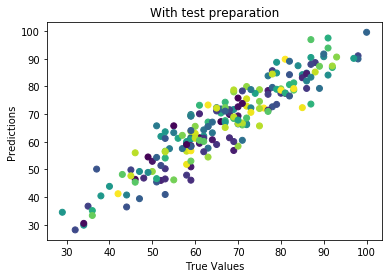

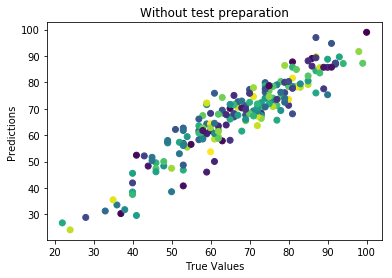

In [26]:
N = 200
plt.figure(1)
colors = np.random.rand(N)
plt.scatter(y_test, prediction, c=colors)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("With test preparation")
plt.figure(2)
colors = np.random.rand(N)
plt.scatter(y1_test, prediction1,c=colors)
plt.title("Without test preparation")
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Prediction of Reading Score

In [27]:
# training data
x = df[['test_preparation_course_map','gender_map','writing score','math score','grades_map','Result_map']]
# target values 
y = df['reading score']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=200)

In [29]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
model.score(x_test,y_test)

0.917680493967904

In [31]:
reading_prediction=model.predict(x_test)
reading_prediction

array([76.5071036 , 81.48894697, 57.60721492, 86.60155295, 53.23213423,
       75.35986598, 64.20143887, 91.26371337, 70.39700975, 59.16878617,
       77.32326742, 75.81462748, 69.82398911, 66.59167741, 44.21171251,
       62.46537059, 78.37830792, 78.41426715, 86.37859324, 43.29637187,
       65.50289485, 42.87815106, 63.9413236 , 76.60733553, 75.28665601,
       70.86205752, 73.09226003, 59.55609784, 72.84689968, 68.52133679,
       53.43706674, 72.01376377, 59.65291628, 82.40885143, 40.57011726,
       73.98520003, 71.41705096, 69.40518684, 69.1957857 , 83.63829378,
       58.35367746, 46.08738547, 78.38383167, 64.62024114, 89.57047709,
       59.46495585, 45.98715353, 67.56994174, 73.98966866, 54.37043459,
       54.60233155, 71.74917987, 79.50751833, 65.55807762, 90.11647576,
       80.45996851, 73.08779141, 56.98348014, 84.93974976, 50.35329696,
       61.41836491, 77.21751173, 67.77487424, 74.33526096, 62.35725651,
       77.62737675, 75.67396769, 65.50630836, 58.64528333, 68.09

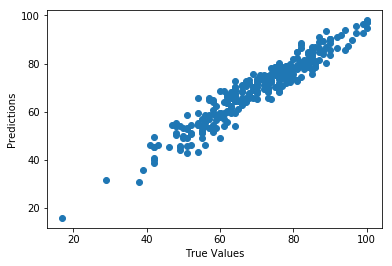

In [32]:
plt.scatter(y_test,reading_prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

Fitting X and y in RandomForestClassifier

In [33]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0);
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Checking the important features

In [34]:
feature=['test_preparation_course_map','gender_map','writing score','math score','grades_map','Result_map']
feature_imp=pd.DataFrame({'feature':feature,'importance':clf.feature_importances_})
feature_imp

,feature,importance
0,test_preparation_course_map,0.021891
1,gender_map,0.033825
2,writing score,0.361775
3,math score,0.198523
4,grades_map,0.336638
5,Result_map,0.047349


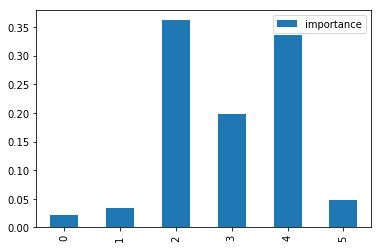

In [35]:
feature_imp.plot.bar()

# Removing the least important features(test preparation)

In [36]:
x1=df[['gender_map','writing score','math score','grades_map','Result_map']]
clf.fit(x1,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
feature1=['gender_map','writing score','math score','grades_map','Result_map']
feature_imp1=pd.DataFrame({'feature':feature1,'importance':clf.feature_importances_})
feature_imp1

,feature,importance
0,gender_map,0.024557
1,writing score,0.405906
2,math score,0.181506
3,grades_map,0.349128
4,Result_map,0.038903


# Prediciting reading score without test preparation course

In [38]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.3,random_state=100)

In [39]:
model.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
model.score(x1_test,y1_test)

0.9161653943311119

In [41]:
prediction1=model.predict(x1_test)
prediction1

array([58.30938263, 57.68857321, 62.00768663, 38.26765996, 47.80238186,
       74.88516021, 89.39374678, 67.53116171, 85.05179844, 62.20809039,
       84.65422771, 74.48776592, 78.3524533 , 75.98098714, 59.88489042,
       44.18394454, 64.519288  , 65.91839675, 67.41403786, 54.64168577,
       82.13403721, 87.94637185, 70.47193431, 56.07805169, 82.48316531,
       74.79087128, 73.83293612, 74.29936452, 91.77622195, 84.21081068,
       72.12830212, 63.46706391, 53.72100779, 78.75861315, 69.02455938,
       71.56776125, 66.99363221, 97.72869181, 89.83716381, 67.55417308,
       81.36432701, 86.12461401, 76.76494315, 82.15704858, 48.3749251 ,
       92.98917273, 93.45560113, 61.28399916, 74.53361221, 69.8653707 ,
       70.79805104, 79.59942447, 76.98494504, 79.43627788, 63.88746957,
       66.4561027 , 65.89538538, 79.83367216, 74.06736027, 70.8693286 ,
       37.98738952, 88.5299241 , 55.42564178, 78.68975549, 66.83048562,
       56.66160394, 47.21882962, 60.93487106, 50.66311134, 44.76

Comparing Predicitons with and without test preparation course

In [42]:
compare_predictions = pd.DataFrame({'With test preparation course':reading_prediction,'Without test preparation course':prediction1})
compare_predictions

,With test preparation course,Without test preparation course
0,76.507104,58.309383
1,81.488947,57.688573
2,57.607215,62.007687
3,86.601553,38.267660
4,53.232134,47.802382
5,75.359866,74.885160
6,64.201439,89.393747
7,91.263713,67.531162
8,70.397010,85.051798
9,59.168786,62.208090


# Using Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [79]:
# training value
X = df[['test_preparation_course_map','gender_map','writing score','math score','grades_map','Result_map']]
# target values 
y = df['reading score']

In [80]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [81]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [82]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1


# Predicition of Writing Score

In [44]:
# tarining value
x = df[['test_preparation_course_map','gender_map','reading score','math score','grades_map','Result_map']]
# target values 
y = df['writing score']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=300)

Fitting x_train and y_train in Linear Model

In [46]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
model.score(x_test,y_test)

0.9347622931696717

In [48]:
writing_prediction=model.predict(x_test)
writing_prediction

array([90.53516523, 90.24962598, 69.8229548 , 82.45422795, 54.34584527,
       53.93470778, 40.96427685, 48.79206419, 55.98266768, 69.92745164,
       75.34448198, 64.24034475, 78.45222761, 79.96376368, 63.61203871,
       80.95117864, 54.73676839, 58.53377509, 64.42658613, 54.39876085,
       85.47769112, 81.4465986 , 48.82387837, 38.33664129, 69.05270837,
       42.19340412, 56.7645139 , 60.27078239, 68.08550779, 82.49465671,
       85.21920679, 74.51447943, 69.81522723, 84.67563051, 87.24695231,
       54.98276589, 64.59945368, 75.87260313, 80.10868928, 81.91837923,
       86.23932296, 69.83544161, 98.12530642, 82.94622296, 41.24252826,
       64.81750924, 83.70754291, 83.70754291, 69.12583833, 68.32377773,
       92.47045343, 60.36336753, 79.79013693, 43.92709688, 35.69218953,
       66.63492676, 68.41667477, 57.79235763, 63.7771787 , 59.9929707 ,
       56.55863326, 43.66905986, 72.49922073, 48.99794483, 93.35337156,
       61.03241423, 60.34315315, 69.37138854, 62.7089062 , 59.02

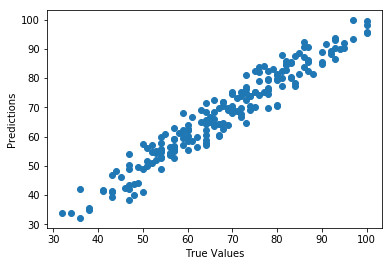

In [49]:
plt.scatter(y_test, writing_prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

Fitting X and y in RandomForestClassifier

In [50]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0);
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Checking the important features

In [51]:
feature=['test_preparation_course_map','gender_map','reading score','math score','grades_map','Result_map']
feature_imp=pd.DataFrame({'feature':feature,'importance':clf.feature_importances_})
feature_imp

,feature,importance
0,test_preparation_course_map,0.027407
1,gender_map,0.030423
2,reading score,0.354323
3,math score,0.186740
4,grades_map,0.351359
5,Result_map,0.049748


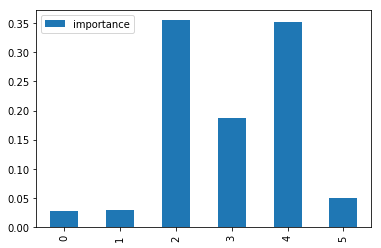

In [52]:
feature_imp.plot.bar()

# Removing the least important features

In [53]:
x1=df[['reading score','math score','grades_map','Result_map']]
clf.fit(x1,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [54]:
feature1=['reading score','math score','grades_map','Result_map']
feature_imp1=pd.DataFrame({'feature':feature1,'importance':clf.feature_importances_})
feature_imp1

,feature,importance
0,reading score,0.504290
1,math score,0.119842
2,grades_map,0.363552
3,Result_map,0.012316


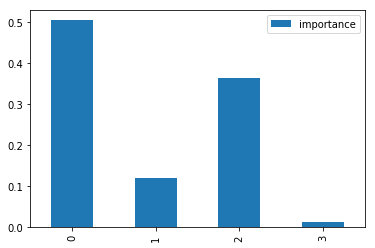

In [55]:
feature_imp1.plot.bar()

Since Result_map has no importance, we can remove it .

In [56]:
x2=df[['reading score','math score','grades_map']]
clf.fit(x2,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
feature2=['reading score','math score','grades_map']
feature_imp2=pd.DataFrame({'feature':feature2,'importance':clf.feature_importances_})
feature_imp2

,feature,importance
0,reading score,0.363656
1,math score,0.299297
2,grades_map,0.337047


Prediciting reading score without test preparation course,gender and result

In [58]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x2,y,test_size=0.2,random_state=123)

Fitting x1_train and y1_train in linear model

In [59]:
model.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
model.score(x1_test,y1_test)

0.9217834114929829

In [61]:
prediction1=model.predict(x1_test)
prediction1

array([33.93430985, 68.84381277, 54.48808873, 74.52261311, 66.33863714,
       72.85688047, 73.47271601, 53.64864572, 69.44649492, 70.24647779,
       54.38286168, 84.51012817, 62.22034239, 80.2277202 , 72.85688047,
       22.69508962, 57.03272451, 76.97517522, 84.49697478, 71.9253638 ,
       72.75165343, 86.12324727, 92.75987104, 27.54760032, 96.83870565,
       86.28108785, 79.48662351, 77.72254456, 72.05689761, 39.06304156,
       88.81257025, 65.51234751, 96.83870565, 70.98069375, 60.40364992,
       72.12266452, 57.05903127, 35.99464391, 59.32744606, 56.07490108,
       71.91221042, 69.42018816, 87.14683761, 74.41738606, 75.19106216,
       74.41738606, 35.14204753, 76.06996531, 70.41747174, 76.20149912,
       87.14683761, 75.13844864, 76.90940832, 59.56420691, 76.28041941,
       68.81750601, 52.87496962, 74.61468677, 53.66179911, 66.94131929,
       84.57589507, 58.64584362, 85.44164484, 58.51430981, 47.55581794,
       83.68383854, 81.15235614, 75.34890273, 69.6043355 , 86.89

Comparing Predicitons

In [62]:
compare_predictions = pd.DataFrame({'With test preparation course,gender,result':writing_prediction,'Without test preparation course,gender,result':prediction1})
compare_predictions

,"With test preparation course,gender,result","Without test preparation course,gender,result"
0,90.535165,33.934310
1,90.249626,68.843813
2,69.822955,54.488089
3,82.454228,74.522613
4,54.345845,66.338637
5,53.934708,72.856880
6,40.964277,73.472716
7,48.792064,53.648646
8,55.982668,69.446495
9,69.927452,70.246478


Text(0, 0.5, 'Predictions')

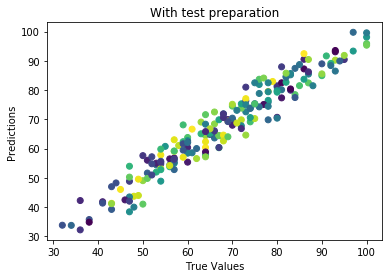

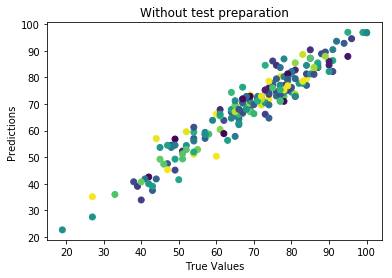

In [63]:
N = 200
plt.figure(1)
colors = np.random.rand(N)
plt.scatter(y_test, writing_prediction, c=colors)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("With test preparation")
plt.figure(2)
colors = np.random.rand(N)
plt.scatter(y1_test, prediction1,c=colors)
plt.title("Without test preparation")
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Using Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [83]:
# training value
X = df[['test_preparation_course_map','gender_map','reading score','math score','grades_map','Result_map']]
# target values 
y = df['writing score']

In [84]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [85]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [86]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.08


# KNN

In [87]:
# Training data
x3 = df[['math score','reading score','writing score']]
# target values 
y3 = df['math score']

X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.20, random_state=40)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train3, y_train3) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [89]:
neigh.score(X_test3,y_test3)

0.22

In [90]:
predict = neigh.predict(X_test3)
predict


array([ 57,  61,  92,  69,  49,  58,  55,  59,  54,  59,  44,  79,  88,
        77,  67,  66,  74,  46,  69,  52,  79,  75,  70,  84,  69,  32,
        66,  88,  82,  62,  60,  79,  32,  78,  58,  74,  53,  69,  48,
        57,  39,  61,  42,  54,  64,  65,  61,  40,  55,  50,  76,  92,
        72,  51,  57,  58,  81,  33,  63,  46,  83,  60,  82,  91,  79,
        68,  58,  78,  69,  53,  94,  70,  70,  59,  84,  58,  69,  78,
        91,  67,  50,  42,  73,  89,  62,  77,  50,  82,  88,  46,  41,
        67,  53,  63,  48,  69,  58, 100,  62,  82,  85,  94,  63,  74,
        53,  72,  78,  52,  58,  65,  70,  44,  49,  62,  77,  63,  78,
        74,  67,  40,  61,  59,  71,  67,  52,  69,  58,  83,  44,  68,
        87,  77,  52,  58,  88,  59,  59,  49,  51,  79,  63,  32,  82,
        78,  63,  71,  55,  77,  70,  72,  88,  58,  65,  67,  55,  88,
        97,  67,  81,  53,  89,  59,  74,  69,  26,  68,  84,  58,  67,
        65,  55,  80,  61,  67,  62,  52,  71,  62,  46,  84,  9

In [91]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test3, predict)
accuracy

0.22